# Analysis of VICTree output tree matrix

In [1]:
import h5py
import numpy as np
import networkx as nx
import seaborn as sns
from treesampling.algorithms import random_spanning_tree_log
from treesampling.utils.graphs import reset_adj_matrix, tree_to_newick

In [2]:
# load h5 file
vic_out = h5py.File("/Users/zemp/phd/scilife/victree-experiments/SA501X3F/victree-out/K12/victree.out.h5ad", 'r')
graph_matrix = vic_out['uns']['victree-tree-graph'][:]
# tempering:
# graph_matrix = graph_matrix / 50
# graph_matrix = np.exp(graph_matrix)

In [3]:
import itertools
K = 12
ss = 500
graph = nx.complete_graph(K, create_using=nx.DiGraph)
for u, v in itertools.product(range(K), repeat=2):
    if v == 0 or u == v:
        graph_matrix[u, v] = -np.inf
graph = reset_adj_matrix(graph, graph_matrix)
nx.to_numpy_array(graph)

array([[           -inf, -2.22471696e+02, -3.10974263e+02,
        -2.27084000e+02, -2.60328534e+02, -1.89449299e+02,
        -2.43601162e+02, -2.48997041e+02, -2.23753649e+02,
        -2.64756995e+02, -9.39916897e+02, -2.42835762e+03],
       [           -inf,            -inf, -1.08951302e+02,
        -1.92892869e+01, -6.74574913e+01, -9.12104307e+00,
        -3.54579394e+01, -2.88709594e+01, -5.44698631e+01,
        -4.55250607e+01, -1.00690750e+03, -2.34891475e+03],
       [           -inf, -1.31075226e+02,            -inf,
        -1.43274745e+02, -1.82593658e+02, -1.28424607e+02,
        -1.77026437e+02, -1.70952266e+02, -1.54096307e+02,
        -1.67136799e+02, -1.18654141e+03, -2.43787294e+03],
       [           -inf, -1.92463057e+01, -1.30495071e+02,
                   -inf, -6.10705843e+01, -3.76192847e-01,
        -6.69811737e+01, -5.65911621e+01, -7.24275962e+01,
        -2.16541785e+01, -1.02179366e+03, -2.38423130e+03],
       [           -inf, -7.09499538e+01, -1.8013810

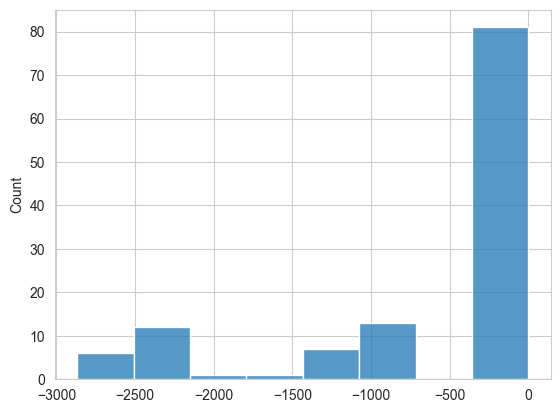

In [4]:
# histogram
g = sns.histplot(graph_matrix[~np.isinf(graph_matrix)])
# TODO: find why such skewed matrix don't run successfully in tree sampling

In [5]:
# draw 100 trees and save them in dict
sample = {}
for i in range(ss):
    tree = random_spanning_tree_log(graph, root=0, trick=False)
    tnwk = tree_to_newick(tree)
    if tnwk not in sample:
        sample[tnwk] = 0
    sample[tnwk] += 1

sorted(sample.items(), key=lambda a: a[1], reverse=True)

/Users/zemp/PycharmProjects/treesampling/src/treesampling/utils/graphs.py:94: RuntimeWarning: invalid value encountered in subtract
  adj_mat = adj_mat - np.logaddexp.reduce(adj_mat, axis=axis, keepdims=True)
/Users/zemp/PycharmProjects/treesampling/src/treesampling/algorithms.py:314: RuntimeWarning: invalid value encountered in log
  ry = - np.log(1 - np.exp(ry_1))


[('(((2,(10)6,7,8)1,(9)3,4,11)5)0', 242),
 ('((((10)6,7,8)1,2,(9)3,4,11)5)0', 130),
 ('(((6,7,8,10)1,2,(9)3,4,11)5)0', 25),
 ('(((4,(10)6,7,8)1,2,(9)3,11)5)0', 25),
 ('(((2,4,(10)6,7,8)1,(9)3,11)5)0', 22),
 ('(((2,(10)6,7,8,11)1,(9)3,4)5)0', 21),
 ('(((2,6,7,8,10)1,(9)3,4,11)5)0', 19),
 ('((((10)6,7,8,11)1,2,(9)3,4)5)0', 16)]